# Импорти и глобални параметри

In [114]:
from dask import dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas_alive

In [115]:
TITLE_FONT_SIZE = 30
AXIS_FONT_SIZE = 25

TITLE_PADDING = 40
AXIS_PADDING = 30

FIGSIZE = (25,10)

In [116]:
plt.rcParams['font.size'] = 15

# Импортиране на файлове

In [117]:
ddf_users = dd.read_csv('..\\data\\raw\\2022_place_canvas_history_users.csv')
ddf_users.head()

,user_id
0,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...
1,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...
2,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...
3,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...
4,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...


In [118]:
ddf_main = dd.read_csv('..\\data\\raw\\2022_place_canvas_history_optimized.csv')
ddf_main.head()

,timestamp,pixel_color,coordinate
0,0,14,"42,42"
1,12356,3,"999,999"
2,16311,7,"44,42"
3,21388,21,"2,2"
4,34094,7,"23,23"


# Работа с таблицата за потребители

In [119]:
all_users = ddf_users.user_id.value_counts().compute().reset_index(name='num_placed_pixels')

### Стълбовидна диаграма за 20-те най-активни потребители

In [120]:
most_active_users = all_users.head(20).set_index('index')
most_active_users.head()

,num_placed_pixels
index,
kgZoJz//JpfXgowLxOhcQlFYOCm8m6upa6Rpltcc63K6Cz0vEWJF/RYmlsaXsIQEbXrwz+Il3BkD8XZVx7YMLQ==,795
JMlte6XKe+nnFvxcjT0hHDYYNgiDXZVOkhr6KT60EtJAGaezxc4e/eah6JzTReWNdTH4fLueQ20A4drmfqbqsw==,781
LNbGhj45pAeCvBYQF1dPvwx1zVfVTy8AdRxTSHi0pR9YeabE3sAd3Rz1MbLFT5k14j0+grrVgqYO1/6BA/jBfQ==,777
8USqGo14WuZQLG7PSAwqfFwICkU0G4VyHZTuV8D1QSbQHE5GFdC2mIK/pMEC/qF1FQH912SDim3ptEFkYPrYMQ==,767
K54RRTUCFuOU55RzSTkjo/ftbJqVi9miyt52YV6NlENRfUyJTPJKBC47N/s2eh4iNdAKMKxa3gvL2XFqCc9AqQ==,767


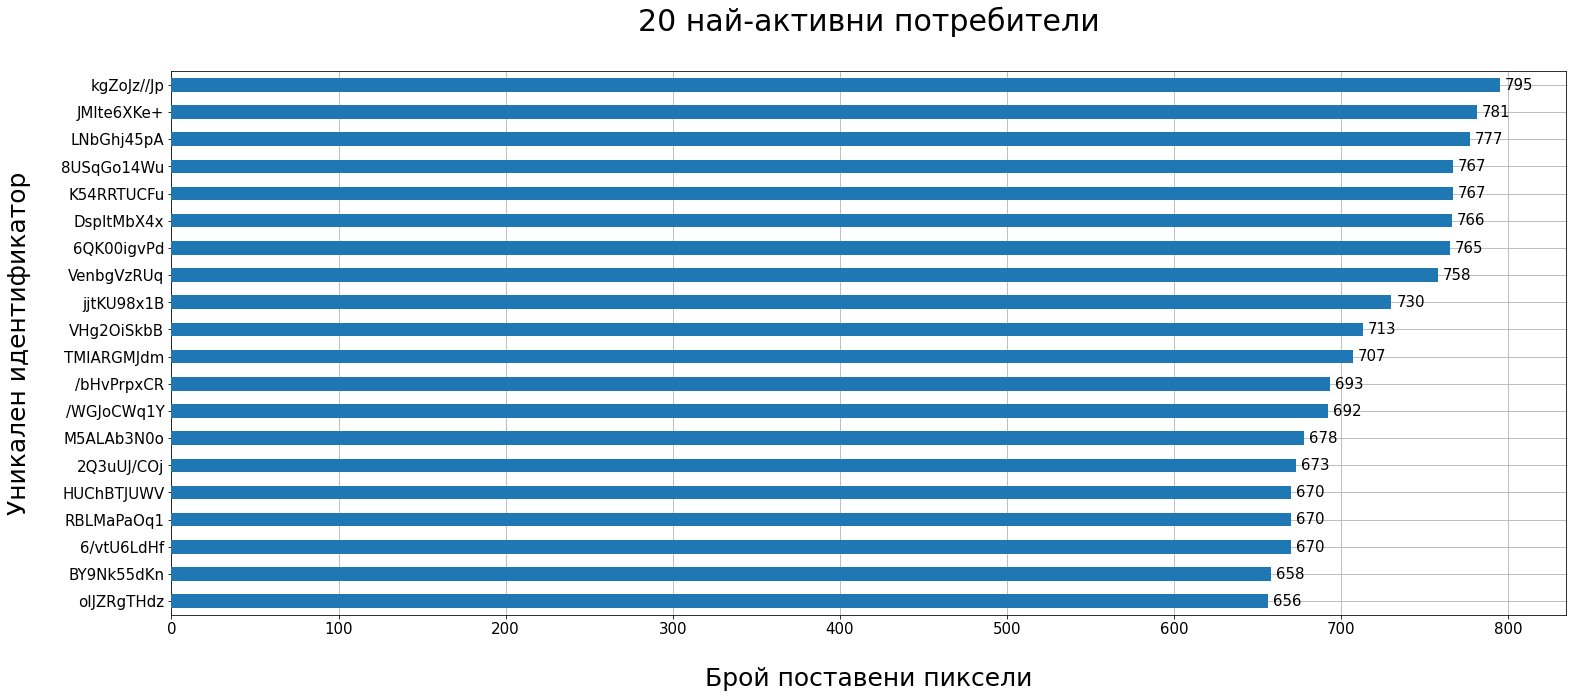

In [121]:
plot = most_active_users.plot(figsize=FIGSIZE, kind='barh', zorder=3)

plot.set_title('20 най-активни потребители', pad=TITLE_PADDING, fontsize=TITLE_FONT_SIZE)
plot.set_xlabel('Брой поставени пиксели', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)
plot.set_ylabel('Уникален идентификатор', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)

y_tick_labels = []
for label in plot.get_yticklabels():
    y_tick_labels.append(label.get_text()[0:10])

plot.set_yticklabels(y_tick_labels)
plot.grid(visible=True, zorder=0)

bar_labels = plot.containers[0]
plot.axes.bar_label(bar_labels, padding=5)

plot.set_xscale('linear')
plot.invert_yaxis()

plot.get_legend().remove()
plot.grid(visible=True)

### Разпръсната диаграма, представяща броят потребители според броят на поставените им пиксели

In [123]:
num_active_users = all_users.num_placed_pixels.value_counts().reset_index(name='users')
num_active_users.head()

,index,users
0,1,2340498
1,2,1175052
2,3,768335
3,4,572021
4,5,460215


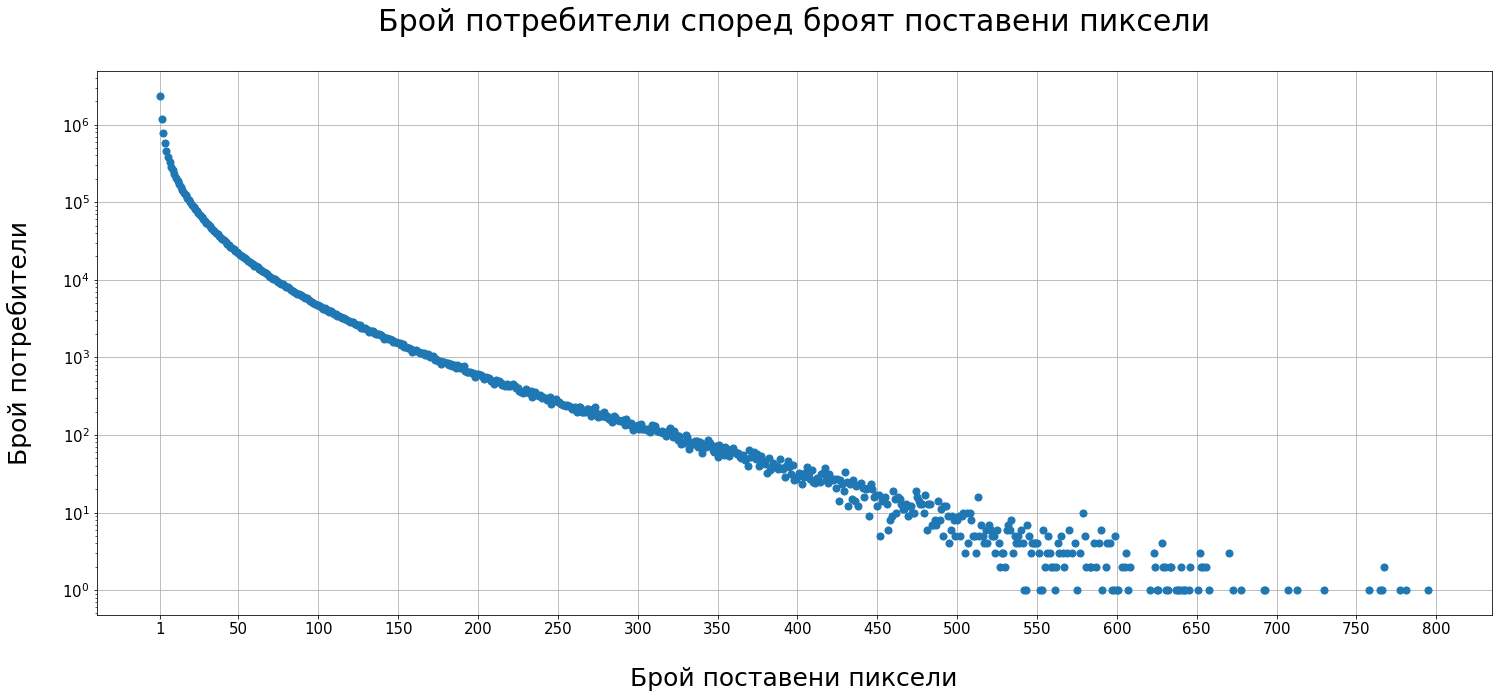

In [124]:
plot = num_active_users.plot(x=0, y=1, figsize=FIGSIZE, kind='scatter', zorder=3, s=50)

plot.set_title('Брой потребители според броя поставени пиксели', pad=TITLE_PADDING, fontsize=TITLE_FONT_SIZE)
plot.set_xlabel('Брой поставени пиксели', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)
plot.set_ylabel('Брой потребители', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)

plot.set_xscale('linear')
plot.set_yscale('log')

plot.set_xticks([1,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])

plot.grid(visible=True, zorder=0)

# Работа с основната информация

## Работа с информация за цветовете

In [125]:
def parse_pixel_color(pixel_color):
    key_to_hex = {
        0: ["#000000", "Черно"],
        1: ["#00756F", "Зелено"],
        2: ["#009EAA", "Синьо"],
        3: ["#00A368", "Тъмно синьо"],
        4: ["#00CC78", "Карибско зелено"],
        5: ["#00CCC0", "Циано"],
        6: ["#2450A4", "Тъмно синьо"],
        7: ["#3690EA", "Светло синьо"],
        8: ["#493AC1", "Синьо-лилаво"],
        9: ["#515252", "Сиво"],
        10: ["#51E9F4", "Тюркоазено"],
        11: ["#6A5CFF", "Светло синьо-лилаво"],
        12: ["#6D001A", "Тъмно червено"],
        13: ["#6D482F", "Кафяво"],
        14: ["#7EED56", "Светло зелено"],
        15: ["#811E9F", "Тъмно лилаво"],
        16: ["#898D90", "Светло сиво"],
        17: ["#94B3FF", "Сиво-синьо",],
        18: ["#9C6926", "Жълто-кафяво"],
        19: ["#B44AC0", "Светло лилаво"],
        20: ["#BE0039", "Червено"],
        21: ["#D4D7D9", "Сребърно"],
        22: ["#DE107F", "Тъмно розово"],
        23: ["#E4ABFF", "Лилаво-розово"],
        24: ["#FF3881", "Светло розово"],
        25: ["#FF4500", "Червено-оранжево"],
        26: ["#FF99AA", "Розово"],
        27: ["#FFA800", "Жълто-оранжево"],
        28: ["#FFB470", "Оранжево"],
        29: ["#FFD635", "Жълто"],
        30: ["#FFF8B8", "Светло жълто"],
        31: ["#FFFFFF", "Бяло"],
    }
    return key_to_hex[pixel_color]

### Диаграма, представяща броят поставени пиксели от всеки цвят

In [126]:
most_used_colors = ddf_main.pixel_color.value_counts().compute()
most_used_colors.head()

0     33707371
31    32251013
25    14411389
6      9989854
29     8519392
Name: pixel_color, dtype: int64

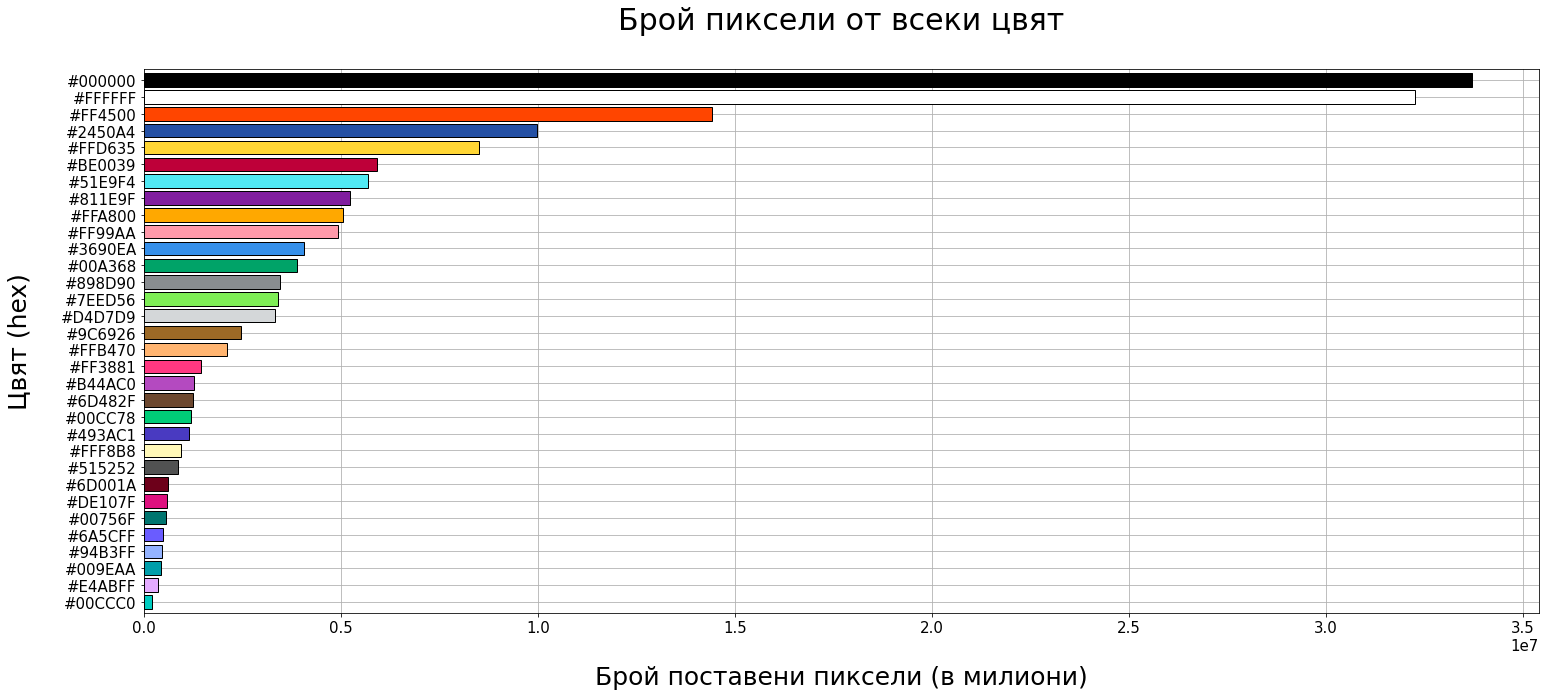

In [127]:
color_bars = []
for color_num in most_used_colors.iteritems():
    color_bars.append(parse_pixel_color(color_num[0])[0])

plot = most_used_colors.plot(figsize=FIGSIZE, kind='barh', color=color_bars, edgecolor='black', zorder=3, width=0.8)

plot.set_title('Брой пиксели от всеки цвят', pad=TITLE_PADDING, fontsize=TITLE_FONT_SIZE)
plot.set_xlabel('Брой поставени пиксели (в милиони)', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)
plot.set_ylabel('Цвят (hex)', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)

colors_names = []
for color_hex in most_used_colors.iteritems():
    colors_names.append(parse_pixel_color(color_hex[0])[0])

plot.set_yticklabels(colors_names)
    
plot.set_xscale('linear')
plot.invert_yaxis()

plot.grid(visible=True, zorder=0)

## Работа с информацията за координатите

In [128]:
active_spots = ddf_main.coordinate.value_counts().compute()

### Диаграма, преставяща 20-те най-често променяни точки

In [129]:
top_active_spots = active_spots.head(20)
top_active_spots.head()

0,0        98807
359,564    69198
349,564    55230
859,766    52261
860,766    51485
Name: coordinate, dtype: int64

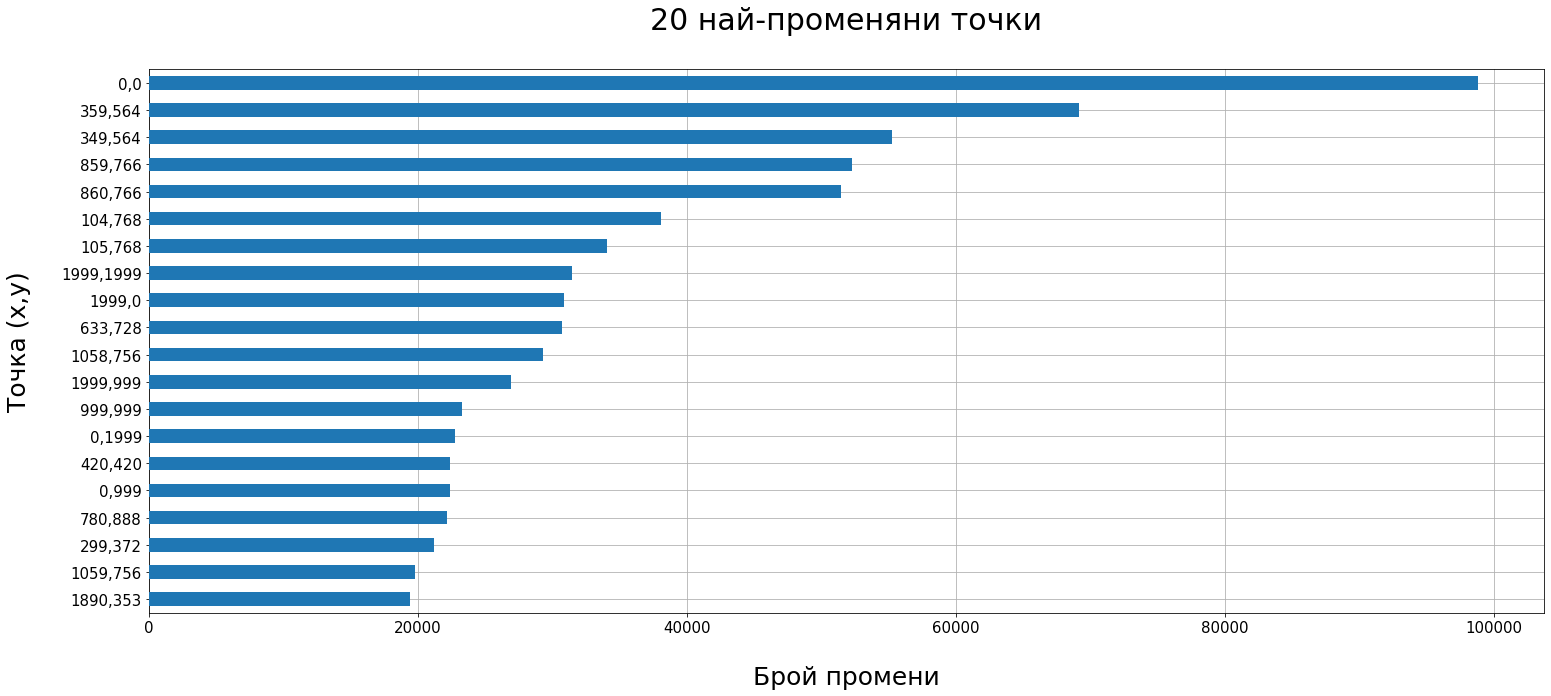

In [130]:
plot = top_active_spots.plot(figsize=FIGSIZE, kind='barh', zorder=3)

plot.set_title('20 най-променяни точки', pad=TITLE_PADDING, fontsize=TITLE_FONT_SIZE)
plot.set_xlabel('Брой промени', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)
plot.set_ylabel('Точка (x,y)', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)

plot.set_xscale('linear')

plot.invert_yaxis()

plot.grid(visible=True, zorder=0)

## Работа с информацията за времето

In [131]:
def parse_timestamp(timestamp):
    date_format = '%Y-%m-%d %H'

    timestamp /= 1000
    timestamp = int(timestamp)
    timestamp += 1648806250

    dt = datetime.fromtimestamp(timestamp).strftime(date_format)
    dt = datetime.strptime(dt, date_format)

    return dt

In [132]:
ddf_date = ddf_main.copy()
ddf_date = ddf_date.drop(['pixel_color', 'coordinate'], axis=1)
ddf_date.head()

,timestamp,pixel_color,coordinate
0,0,14,"42,42"
1,12356,3,"999,999"
2,16311,7,"44,42"
3,21388,21,"2,2"
4,34094,7,"23,23"


In [133]:
ddf_date = ddf_date.rename(columns={'timestamp': 'datetime'})
ddf_date['datetime'] = ddf_date['datetime'].map(parse_timestamp)
ddf_date.head()

,datetime
0,2022-04-01 12:00:00
1,2022-04-01 12:00:00
2,2022-04-01 12:00:00
3,2022-04-01 12:00:00
4,2022-04-01 12:00:00


### Анимирана графика, показваща броя поставени пиксели за всеки час

In [134]:
ddf_date = ddf_date.datetime.value_counts('datetime').compute()
ddf_date.head()

2022-04-04 21:00:00    5901646
2022-04-04 22:00:00    5640455
2022-04-04 20:00:00    4904479
2022-04-04 19:00:00    4567933
2022-04-03 21:00:00    4480088
Name: datetime, dtype: int64

In [135]:
ddf_date = ddf_date.reset_index(name='num_placed_pixels').sort_values('index').set_index('index')
ddf_date.head()

,num_placed_pixels
index,
2022-04-01 12:00:00,19
2022-04-01 13:00:00,548836
2022-04-01 14:00:00,867847
2022-04-01 15:00:00,996924
2022-04-01 16:00:00,1070919


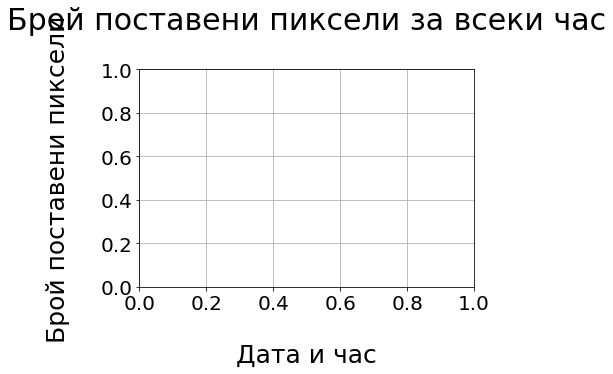

In [136]:
plt.rcParams['font.size'] = 20
fig = plt.figure()
ax = plt.axes()

ax.set_title('Брой поставени пиксели за всеки час', pad=TITLE_PADDING, fontsize=TITLE_FONT_SIZE)
ax.set_xlabel('Дата и час', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)
ax.set_ylabel('Брой поставени пиксели', labelpad=AXIS_PADDING, fontsize=AXIS_FONT_SIZE)

ax.set_yscale('linear')

ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.zorder = 3
ax.grid(visible=True, zorder=0)

In [137]:
date_format = '%H:%M %d-%m-%Y'

ddf_date.plot_animated(filename='activity_over_time_plot.gif', 
    fig=fig, 
    add_legend=False, 
    kind='line', 
    figsize=FIGSIZE,
    period_fmt=date_format,
    period_label=False,
    tick_label_size=16,
    label_events={    
        '  Първи ден': datetime.strptime('00:00 01-04-2022', date_format),
        '  Втори ден': datetime.strptime('00:00 02-04-2022', date_format),
        '  Трети ден': datetime.strptime('00:00 03-04-2022', date_format),
        '  Четвърти ден': datetime.strptime('00:00 04-04-2022', date_format)
    },
    fill_under_line_color='g',
    antialiased=True
)

Generating LineChart, plotting ['num_placed_pixels']


LineChart(df=                     num_placed_pixels
index                                 
2022-04-01 12:00:00               19.0
2022-04-01 12:12:00           109782.4
2022-04-01 12:24:00           219545.8
2022-04-01 12:36:00           329309.2
2022-04-01 12:48:00           439072.6
...                                ...
2022-04-04 23:12:00          2509747.8
2022-04-04 23:24:00          1962269.6
2022-04-04 23:36:00          1414791.4
2022-04-04 23:48:00           867313.2
2022-04-05 00:00:00           319835.0

[421 rows x 1 columns], interpolate_period=True, steps_per_period=5, period_length=500, period_fmt='%H:%M %d-%m-%Y', figsize=(25, 10), title=None, fig=<Figure size 1800x720 with 1 Axes>, cmap='dark24', tick_label_size=16, period_label=False, period_summary_func=None, fixed_max=False, dpi=144, writer=None, enable_progress_bar=False, kwargs={'antialiased': True}, line_width=2, label_events={'  Първи ден': datetime.datetime(2022, 4, 1, 0, 0), '  Втори ден': datetime.datetime(20

### Анимирана графика, показваща броя и вида поставевни цветове за всеки час

In [146]:
ddf_pivot = ddf_main.copy()
ddf_pivot = ddf_pivot.drop('coordinate', axis=1)
ddf_pivot.head()

,timestamp,pixel_color
0,0,14
1,12356,3
2,16311,7
3,21388,21
4,34094,7


In [147]:
ddf_pivot = ddf_pivot.rename(columns={'timestamp': 'datetime'})
ddf_pivot['datetime'] = ddf_pivot['datetime'].map(parse_timestamp)
ddf_pivot.head()

,datetime,pixel_color
0,2022-04-01 12:00:00,14
1,2022-04-01 12:00:00,3
2,2022-04-01 12:00:00,7
3,2022-04-01 12:00:00,21
4,2022-04-01 12:00:00,7


In [155]:
ddf_pivot['pixel_color'] = ddf_pivot['pixel_color'].astype('category').cat.as_known()
ddf_pivot.dtypes

datetime       datetime64[ns]
pixel_color          category
dtype: object

In [156]:
ddf_pivot = ddf_pivot.pivot_table(index='datetime', columns='pixel_color', aggfunc='count')

datetime
2022-04-01 12:00:00
2022-04-01 13:00:00
2022-04-01 14:00:00
2022-04-01 15:00:00
2022-04-01 16:00:00


In [159]:
ddf_pivot.to_csv('..\\data\\raw\\2022_place_canvas_history_pivot.csv', single_file=True)

['f:\\Дипломна работа\\code\\data\\raw\\2022_place_canvas_history_pivot.csv']